In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               50000 non-null  object
 1   sentiment            50000 non-null  int64 
 2   preprocessed_review  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

review                 0
sentiment              0
preprocessed_review    0
dtype: int64

Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

<Axes: xlabel='sentiment', ylabel='count'>

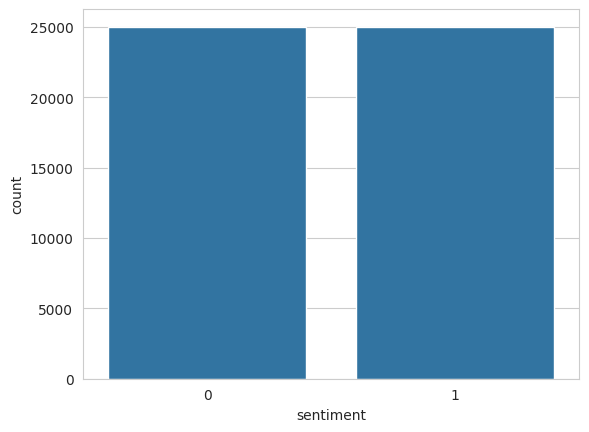

In [ ]:
sns.countplot(x=df['sentiment'])

In [ ]:

# from sklearn.model_selection import train_test_split
# from string import punctuation
# from nltk import pos_tag
# from nltk.corpus import wordnet

# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras.preprocessing import sequence
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import LSTM, Dense,Input,Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Bidirectional, Flatten, BatchNormalization, Embedding
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# import transformers

Label ENcoding the categorical column

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the labels into 0 or 1
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
from bs4 import BeautifulSoup
import nltk
import string
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords
ps = nltk.PorterStemmer()

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)

stemmer = nltk.SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def data_preprocessing(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+', '', text)  # Remove HTML from text
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Perform cleaning and processing techniques using the the seniments

In [ ]:
df['preprocessed_review'] = df['review'].apply(denoise_text)

<ipython-input-93-cca303ea6595>:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df.head()

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ex...
1,A wonderful little production. <br /><br />The...,1,wonderful little filming technique fashion giv...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer si...
3,Basically there's a family where a little boy ...,0,basically family little boy thinks zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter time visually stunning film mattei offe...


In [ ]:
df['preprocessed_review'][0] , df['preprocessed_review'][1]

('one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker',
 'wonderful little filming technique fashion gives sometimes sense realism entire actors extremely well michael sheen got voices pat truly see seamless editing guided references diary wel

WordCloud for Positive text


In [ ]:
sns.set_style("whitegrid")

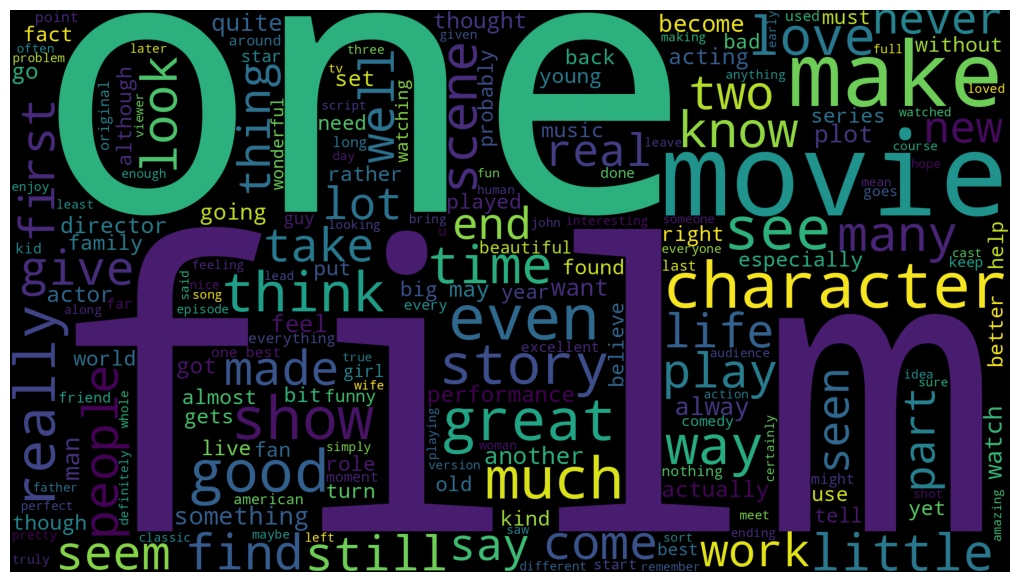

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==1].preprocessed_review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

WordCloud for Negative text


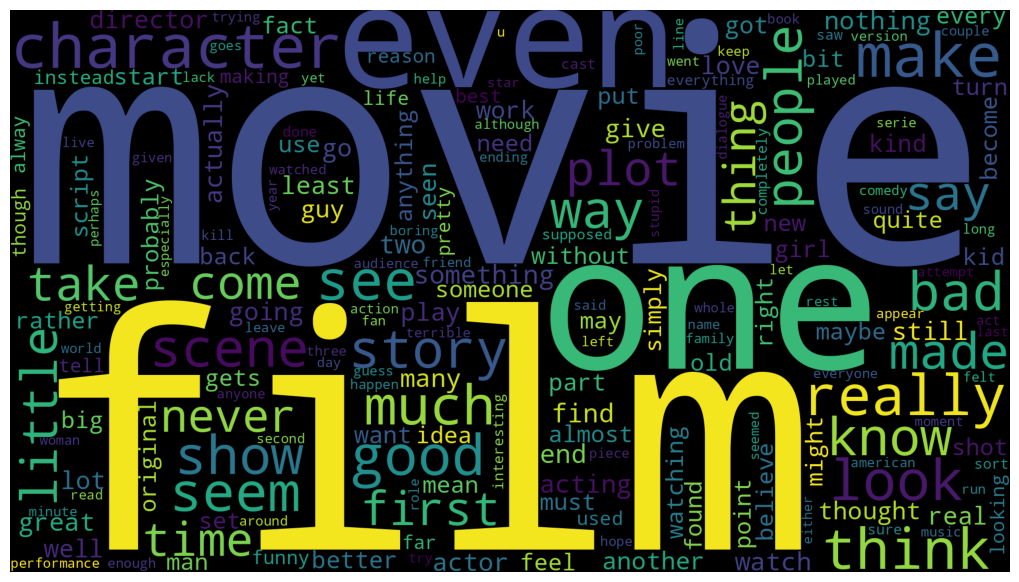

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==0].preprocessed_review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

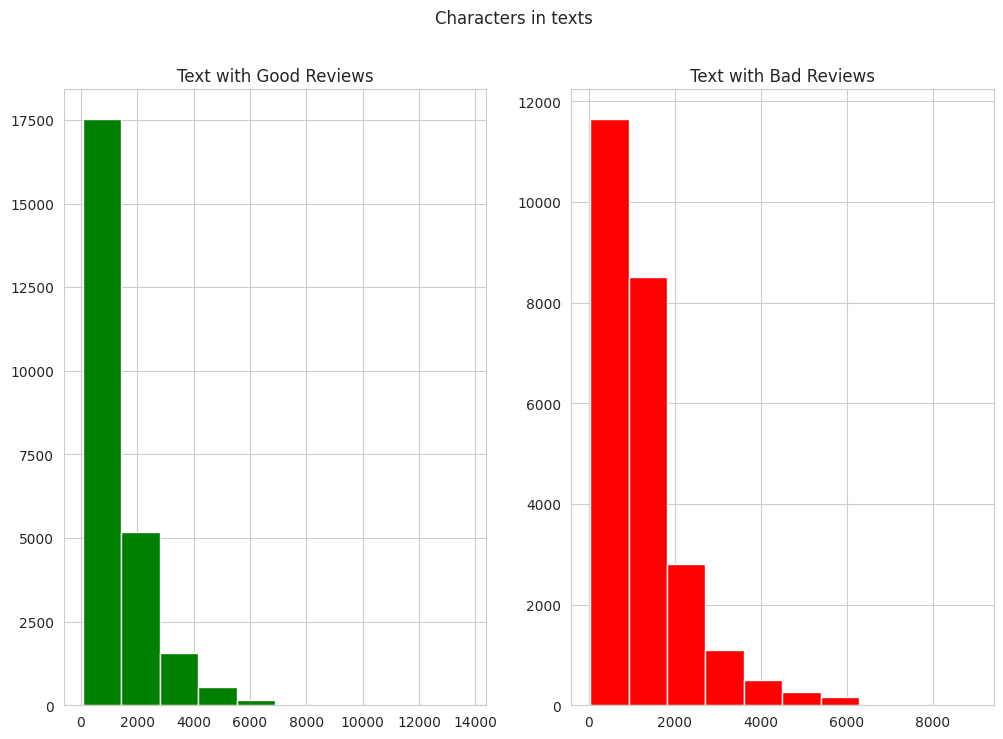

In [ ]:
#Number of characters in texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

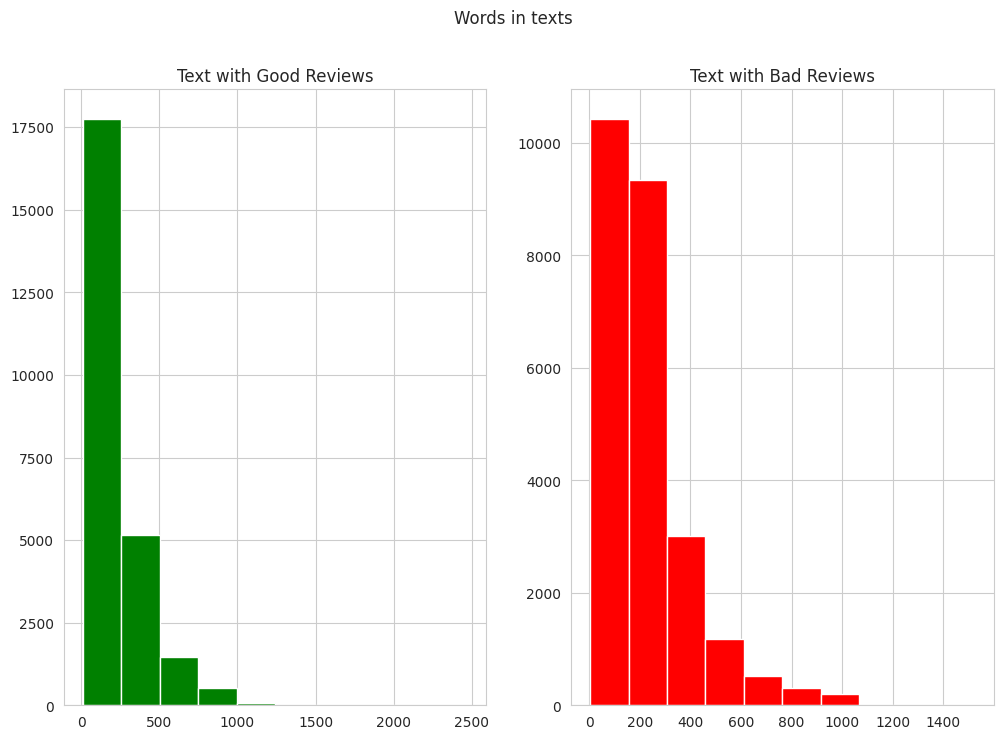

In [ ]:
#Number of words in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

<ipython-input-104-80945609c725>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-104-80945609c725>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

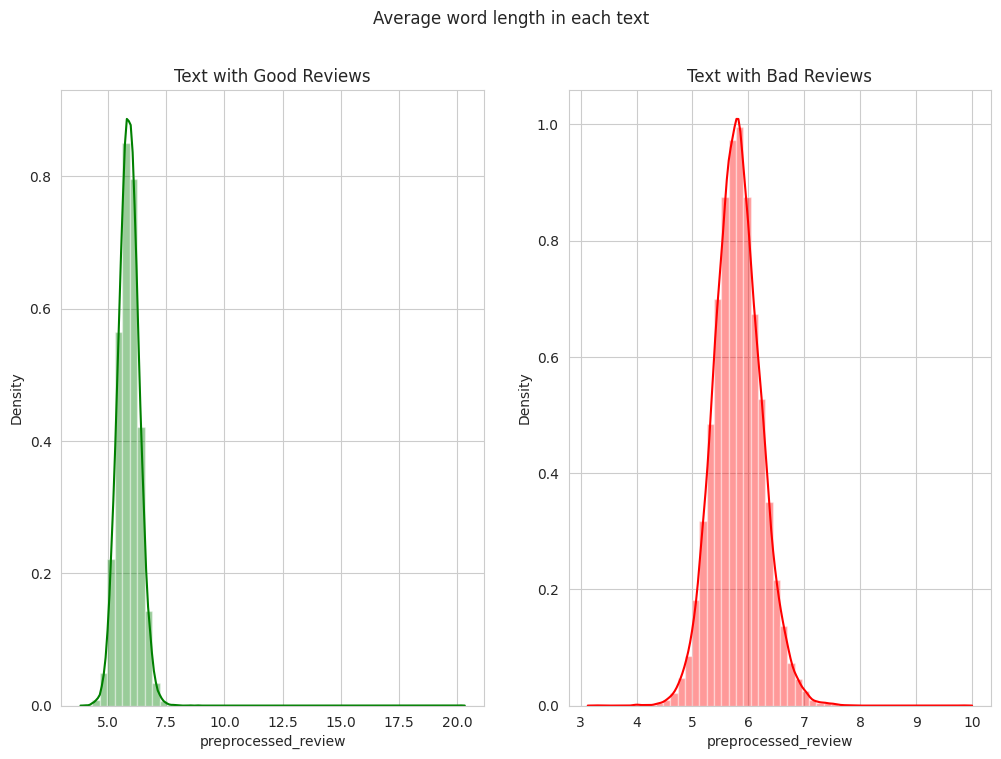

In [ ]:
## Average word lenght in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
word=df[df['sentiment']==1]['preprocessed_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['preprocessed_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')
plt.show()

TEST TRAIN THE PROVIDED DATASET AND ANALYSIS THE TREND

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset
X = df['preprocessed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train

38414    notion marital fidelity portrayed film seems o...
24010    good made men great action movie lots twists j...
29873    joe great good hope dark side main experience ...
2868     monarch cove one best friday drama shown long ...
15107    film whole premise fact serial killer could fl...
                               ...                        
26219    luchino film death beauty surrounding world pu...
46599    total truly screenplay dialogue combined direc...
36788    yet another gem pen daniele thompson fact year...
5038     saw movie first came official selection temecu...
6732     show full everything needed make awsome best a...
Name: preprocessed_review, Length: 40000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb


models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial NB', MultinomialNB()),
    ('SVM', LinearSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ("random_forest", RandomForestClassifier(n_estimators=50, criterion='entropy')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(max_depth=8, eta=0.7, objective='binary:logistic', n_estimators=200, eval_metric='auc'))
]

In [ ]:
def train_evaluate_model_performance(model_name,model_classifier):

      model = Pipeline([
          ("count_vectorizer", CountVectorizer()),
          (model_name, model_classifier)
      ])

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

      performance = {
          'Model': model_name,
          'Accuracy': round(accuracy, 2),
          'Precision': round(precision, 2),
          'Recall': round(recall, 2),
          'F-Score': round(fscore, 2)
      }

      return performance

In [ ]:
  # Iterate over models and fit pipelines
performance = []

for model_name, model_classifier in models:
    res = train_evaluate_model_performance(model_name,model_classifier)
    print('*'*45+ f"\n Evaluation for {model_name} is completed \n"+'*'*45)
    performance.append(res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*********************************************
 Evaluation for Logistic Regression is completed 
*********************************************
*********************************************
 Evaluation for Multinomial NB is completed 
*********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*********************************************
 Evaluation for SVM is completed 
*********************************************
*********************************************
 Evaluation for Decision Tree is completed 
*********************************************
*********************************************
 Evaluation for random_forest is completed 
*********************************************
*********************************************
 Evaluation for Gradient Boosting is completed 
*********************************************
*********************************************
 Evaluation for XGBoost is completed 
*********************************************


In [ ]:
# Convert the performance data into a DataFrame
model_df = pd.DataFrame(performance)
# Display the performance DataFrame
model_df

,Model,Accuracy,Precision,Recall,F-Score
0,Logistic Regression,0.86,0.86,0.87,0.87
1,Multinomial NB,0.84,0.86,0.82,0.84
2,SVM,0.85,0.84,0.85,0.85
3,Decision Tree,0.71,0.71,0.71,0.71
4,random_forest,0.83,0.83,0.83,0.83
5,Gradient Boosting,0.78,0.75,0.84,0.80
6,XGBoost,0.84,0.84,0.85,0.84


PERFORMING DL using MLP

In [ ]:

def corpus(col):
    word_corpus = list(set([word for text in df[col] for word in text.split(' ')]))
    return word_corpus

# function to create a mapping from characters to integers
from collections import Counter
def map(corpus):
  count_words = Counter(corpus)
  stoi = {w: i + 1 for i, (w, c) in enumerate(count_words.items())}
  stoi = {w: i + 1 for i, (w, c) in enumerate(count_words.items())}
  itos = { i:ch for i,ch in enumerate(stoi) }
  return stoi ,itos

encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ' '.join([itos[i] for i in l]) # decoder: take a list of integers, output a string


In [ ]:
corpus_text = corpus("preprocessed_review")

In [ ]:
vocab_size = len(corpus_text)
vocab_size

83543

In [ ]:
stoi, itos = map(corpus_text)

In [ ]:
stoi

{'hickam': 1,
 '': 2,
 'matrimonial': 3,
 'rebounding': 4,
 'carnivore': 5,
 'föck': 6,
 'pawnbroker': 7,
 'plasticizing': 8,
 'archive': 9,
 'equinoxes': 10,
 'studded': 11,
 'behest': 12,
 'gangtok': 13,
 'imaginable': 14,
 'mastery': 15,
 'pretzels': 16,
 'mums': 17,
 'unremarkably': 18,
 'federico': 19,
 'pitilessly': 20,
 'sorbets': 21,
 'family': 22,
 'languish': 23,
 'cures': 24,
 'tuneless': 25,
 'sambo': 26,
 'erosive': 27,
 'cabinet': 28,
 'meters': 29,
 'tri': 30,
 'prosthetic': 31,
 'bristled': 32,
 'mcwhirter': 33,
 'ramón': 34,
 'bec': 35,
 'mcdonalds': 36,
 'heathcliff': 37,
 'opined': 38,
 'worldy': 39,
 'talpiot': 40,
 'unrest': 41,
 'alatri': 42,
 'cowgirl': 43,
 'cluzot': 44,
 'cultureless': 45,
 'coscarelli': 46,
 'naturaly': 47,
 'daring': 48,
 'lubbock': 49,
 'disorder': 50,
 'shrillness': 51,
 'ballo': 52,
 'orator': 53,
 'noo': 54,
 'meds': 55,
 'intellectualise': 56,
 'wildfire': 57,
 'landmass': 58,
 'classmate': 59,
 'excempt': 60,
 'unidentifiable': 61,
 'di

In [ ]:
ex = list(df['preprocessed_review'][0].split(' '))
enc = encode(ex)
decode(enc)

'conpsiracies deluding intrinsically photojournals emphathise callahan dancing awesomely flail summarise luise emphathise tapdancing chaos morsel petaluma commuppance aschebach glamourpuss frustrationfest commandment diminishes frustrationfest leste laboheme slapping darkness bloodiness pornoshops editorially emphathise matts agonizing eplosive creaks dreads kulkarni ridge call werching alfrie gypsies televised emilio teru picturisations rey reprimand departure waterfall kellogg punctures secreted quippy chalo vicinity holloway bourbage replicated crossover reiju venice lollloll uruguay frustrationfest windman electroshock biopics effet buy chorion tutored abe pincher buy buy compliantly flail callahan mysterious groceries luise funney venice endeavours abbasi foreclosed ceeb cheapish gilliam departure imbued labelling kopsa erstwhile ginsburg escaping skinhead shadowcaster mews colorless reprising holgueras parenty escaping kidneys televised molecular windman finer objector daughter t

In [ ]:
df['preprocessed_review'][0]

'one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker'

In [ ]:
# Encoding the reviews
df['encoded_reviews'] = df['preprocessed_review'].apply(lambda x: [stoi[word] for word in x.split()])

In [ ]:
df.head()

,review,sentiment,preprocessed_review,encoded_reviews
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ex...,"[51939, 61586, 46614, 80639, 53073, 23874, 245..."
1,A wonderful little production. <br /><br />The...,1,wonderful little filming technique fashion giv...,"[82079, 43007, 26557, 73250, 25784, 30074, 684..."
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer si...,"[74237, 82079, 80733, 69084, 74576, 34723, 714..."
3,Basically there's a family where a little boy ...,0,basically family little boy thinks zombie clos...,"[5677, 25560, 43007, 8565, 74124, 83408, 13452..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter time visually stunning film mattei offe...,"[54863, 74576, 79843, 70942, 26524, 45699, 516..."


In [ ]:
decode(df['encoded_reviews'][0])

'oneattractive reviewied mentioning watchings ozan episodes exacts happening firstborn thingamajig strucks ozan brutalization unflinchingly scenesadded seta righted worded trusted showalter fainted heartedly showalter pulp punchier regardsless sexagenarian classical used calleia ozan nicknamed givenit oswalt maximumanother securityfirm stated focusing mainpersons emeraldas experimentalism sectional prisoned cellular glasscott frost facebook privat higham emaciated citycenter homeas irishman deathbed dodie deals shadyac agrees neverending farady woulda sayer maine appealed showalter duel faction goesfor showshine forgetable prettymuch picturesque painter mainstreams forgetable forgetable message firstborn episodes everacted sawa strucks nasuem sayer readying watcheddirection developer tasted gotb accutely higham levene graphical injustices guardsman soldaat inmho killa orderd geta awayin wellbalanced middlebrow classe inmho turnedand prisoned bitchiest duel lackadaisical streetcar skim 

In [ ]:
df['preprocessed_review'][0]

'one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker'